# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [678]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

## Dataset
---

In [679]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [680]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [681]:
data.describe()


,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


## Vizuelizacija podataka
---


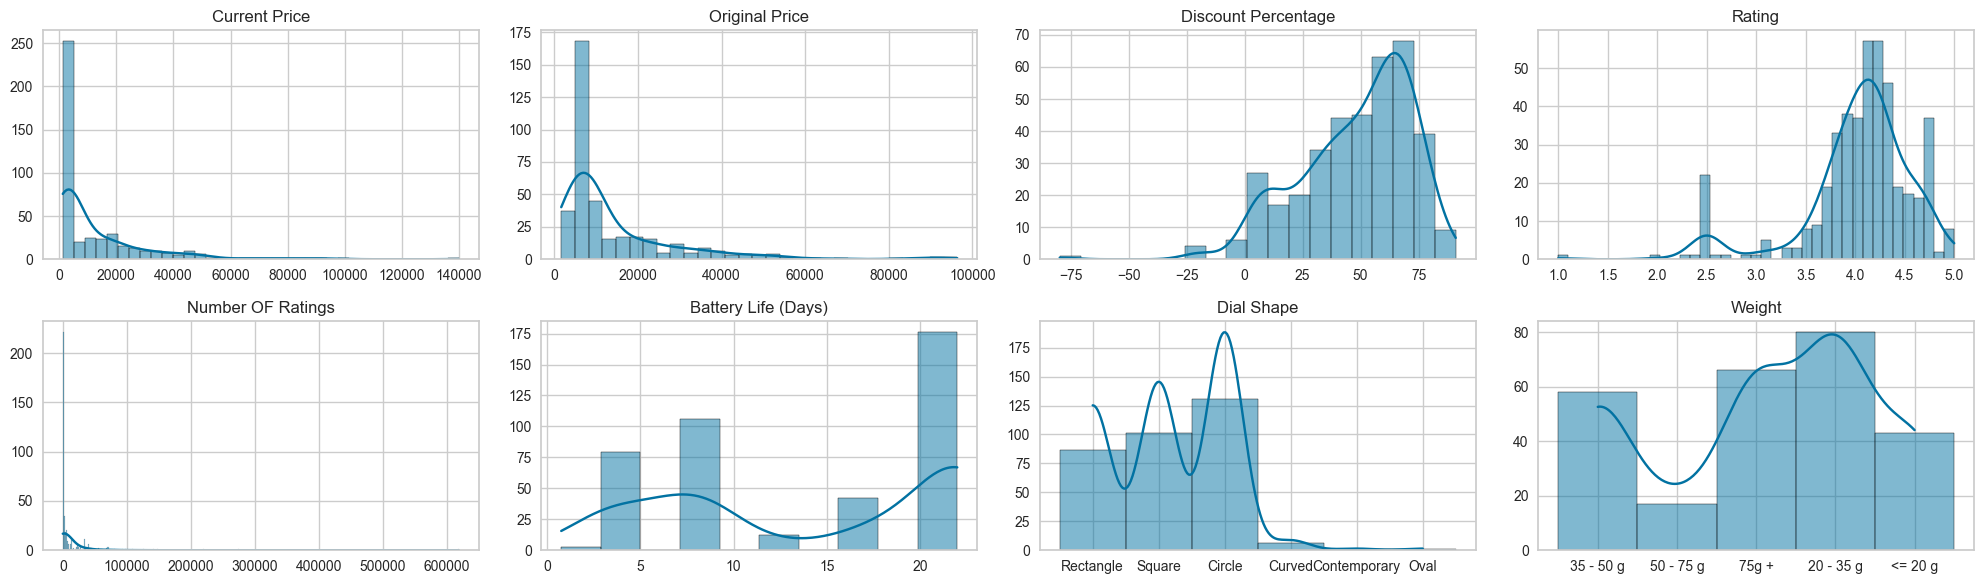

In [682]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

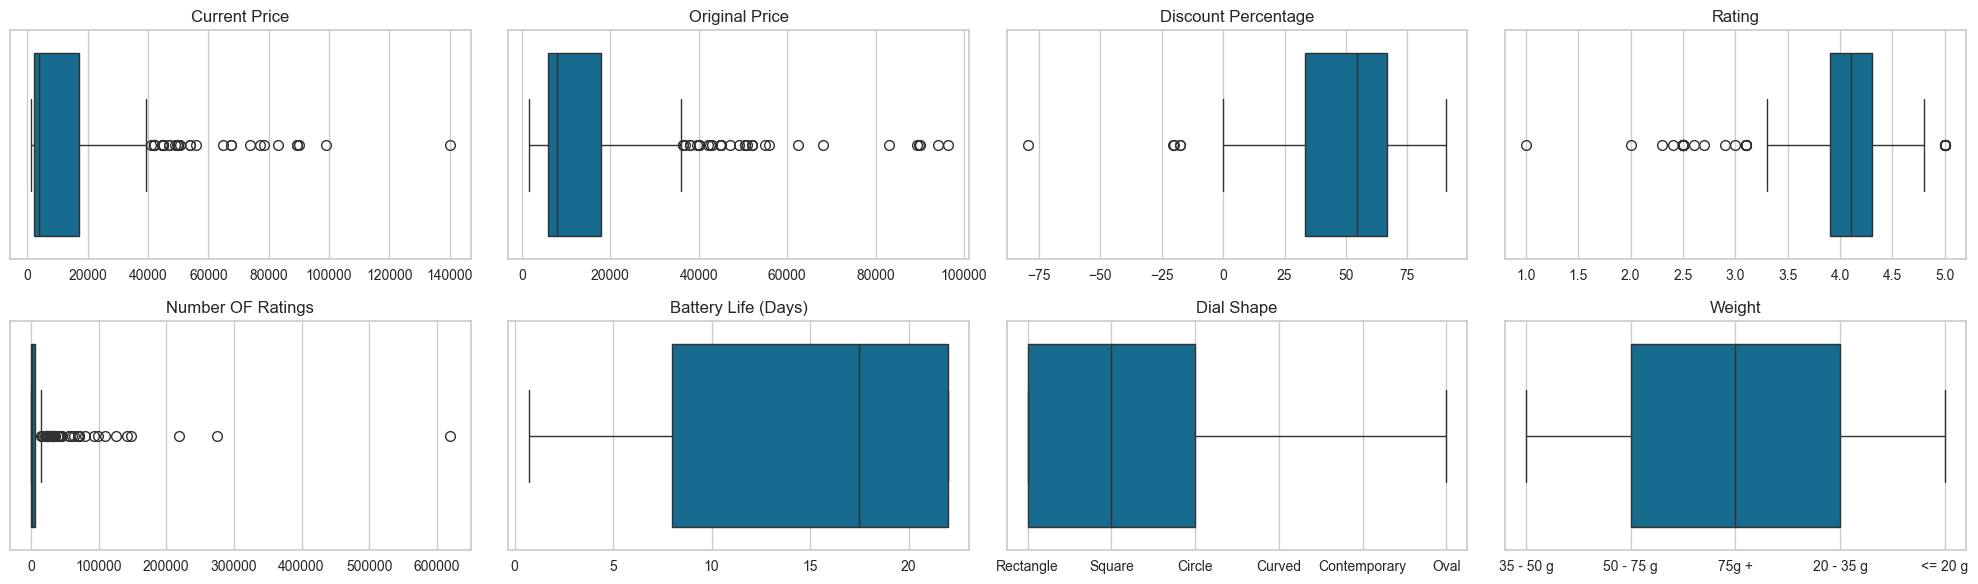

In [683]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


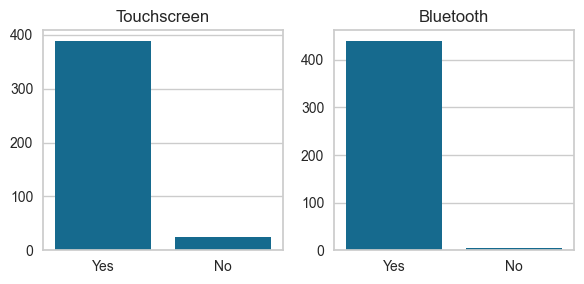

In [684]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

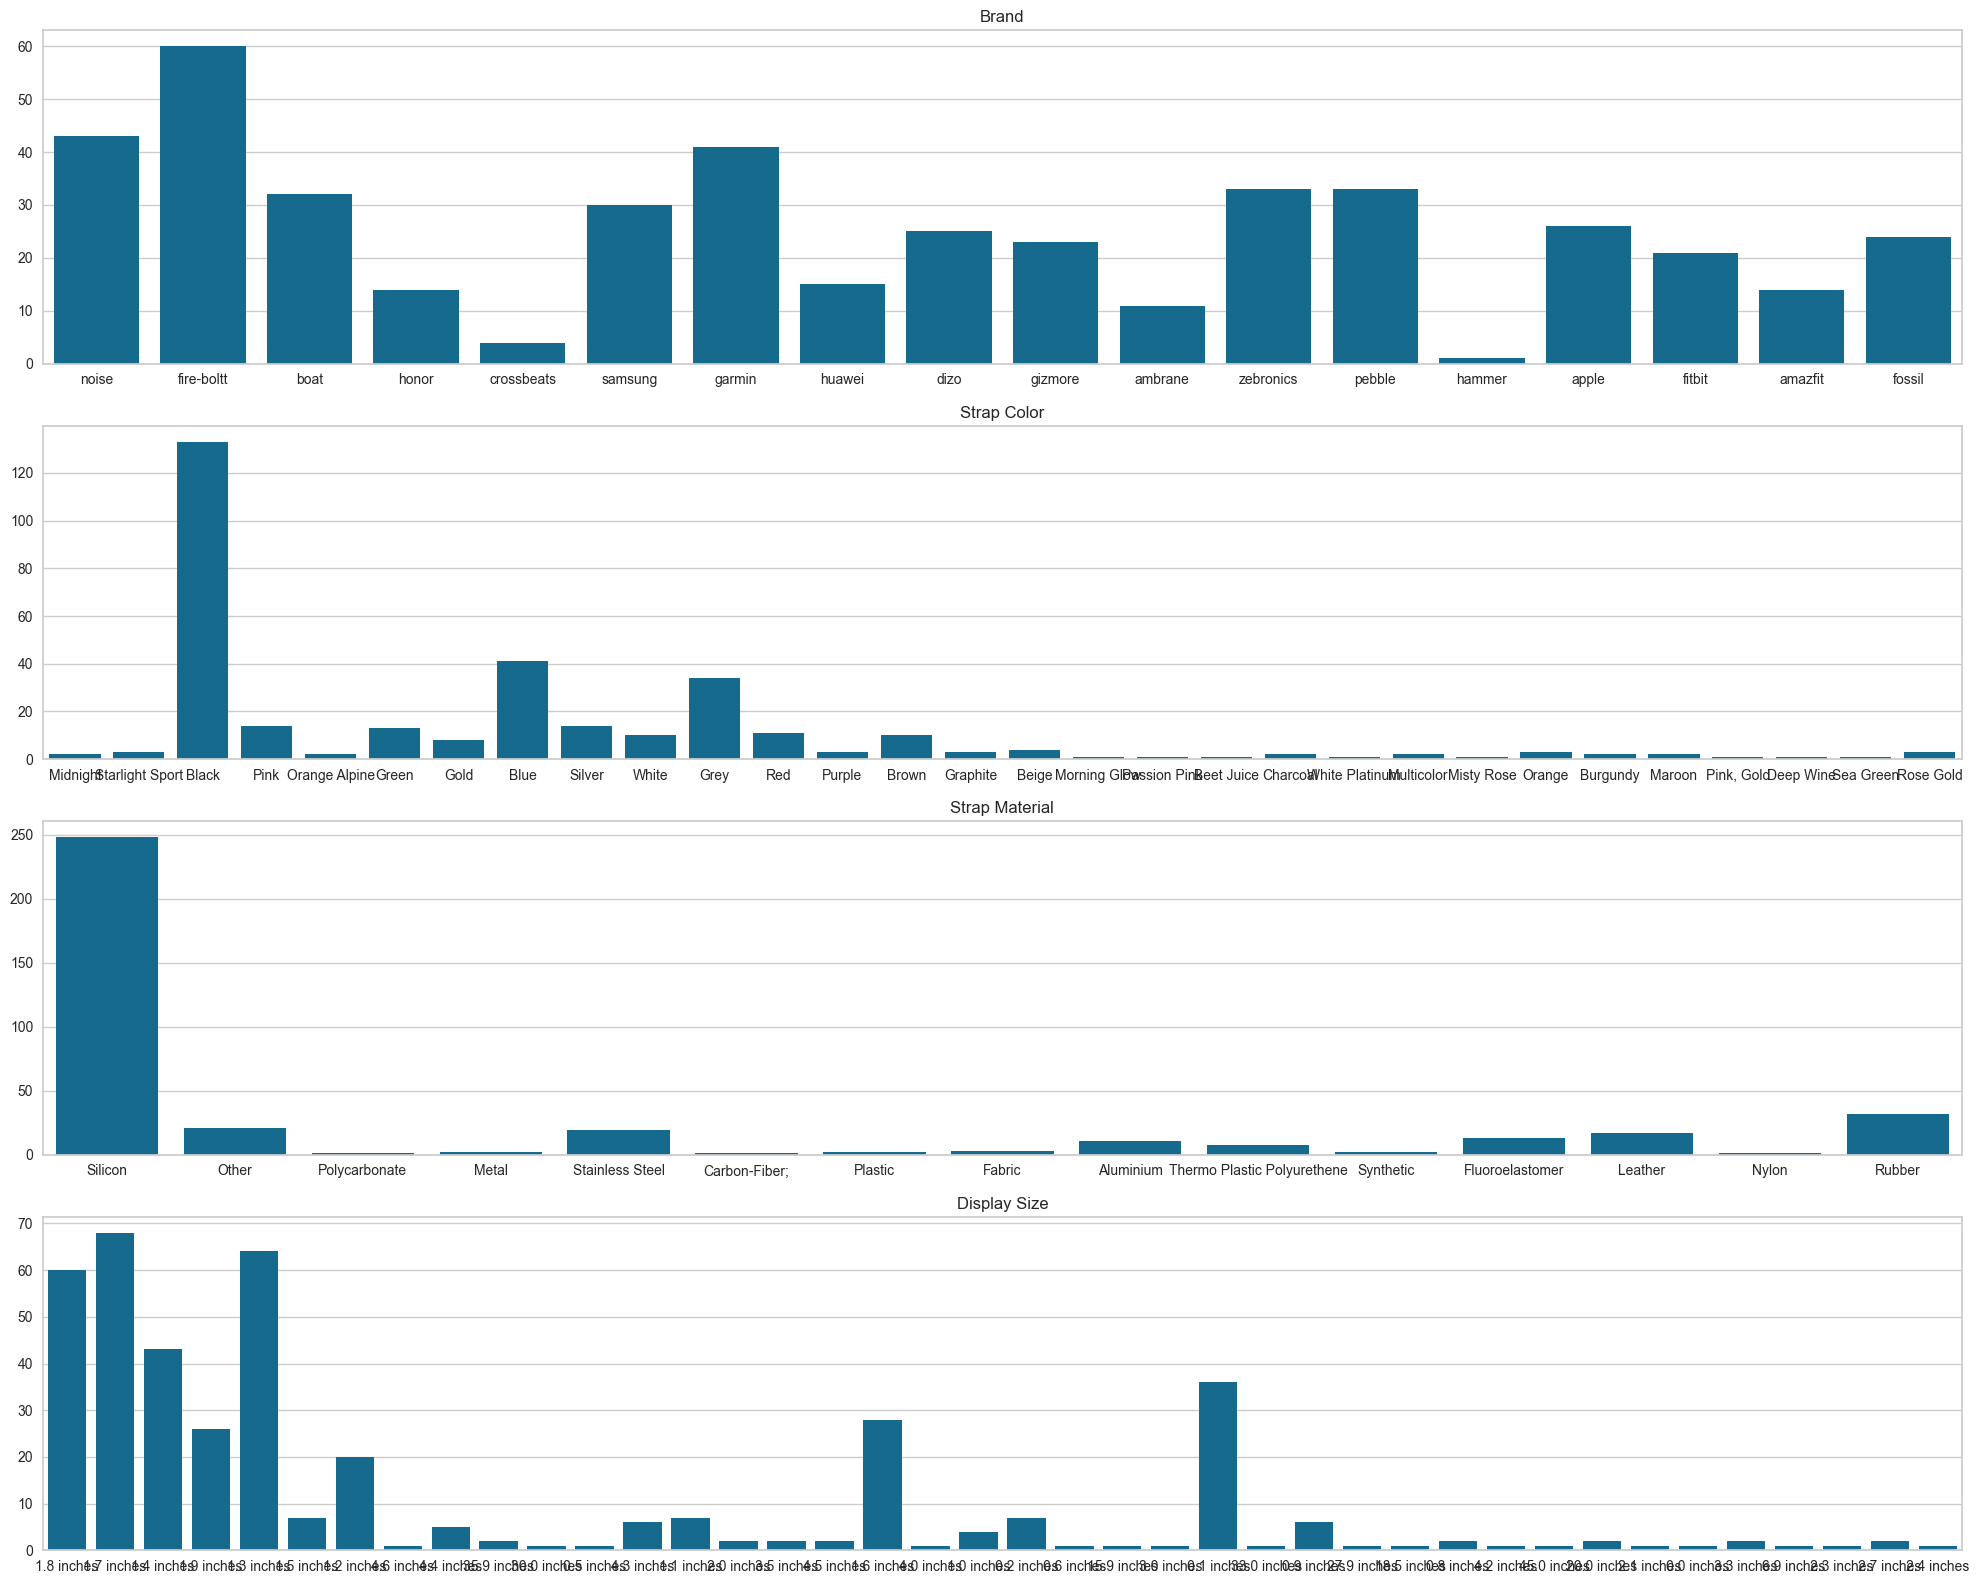

In [685]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

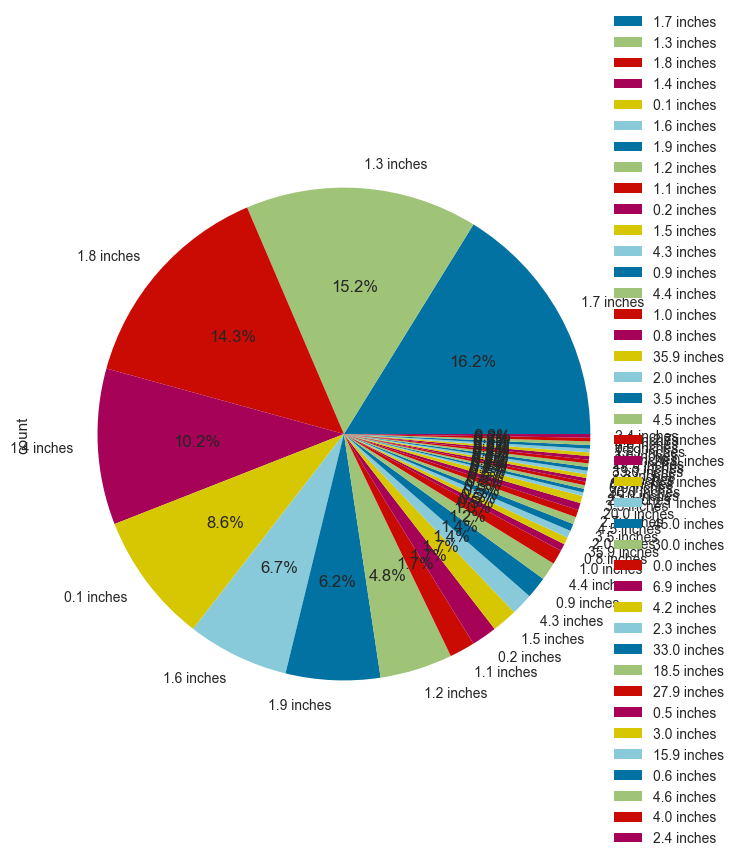

In [686]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc='right')
plt.show()

### pronalazenje outliera

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

 Standard Deviation Method

In [687]:

columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")



Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


Interquartile Range Method

In [688]:

for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


logaritam za ublazavanje outliera

In [689]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]


In [690]:
for column in columns:
    data_mean, data_std = mean(data1[column]), std(data1[column])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data1[column] if x < lower or x > upper]
    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


brisanje redova koji imaju outliere

In [691]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 40000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
5,noise,1499.0,3999.0,62.515629,4.0,32704.0,NSW-05,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,fire-boltt,3999.0,9999.0,60.006001,3.1,8.0,ring,Rectangle,Black,Silicon,Yes,22.0,Yes,0.1 inches,NaN
426,fire-boltt,3599.0,5999.0,40.006668,5.0,3.0,bsw001,Rectangle,Black,Silicon,Yes,22.0,Yes,1.4 inches,NaN
431,fire-boltt,3999.0,9999.0,60.006001,3.7,3.0,bsw016,Square,Pink,Silicon,Yes,22.0,Yes,1.7 inches,NaN
434,fire-boltt,2298.0,5999.0,61.693616,3.6,5.0,ninja 2 max,Square,Black,Rubber,Yes,22.0,Yes,0.1 inches,NaN


In [692]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


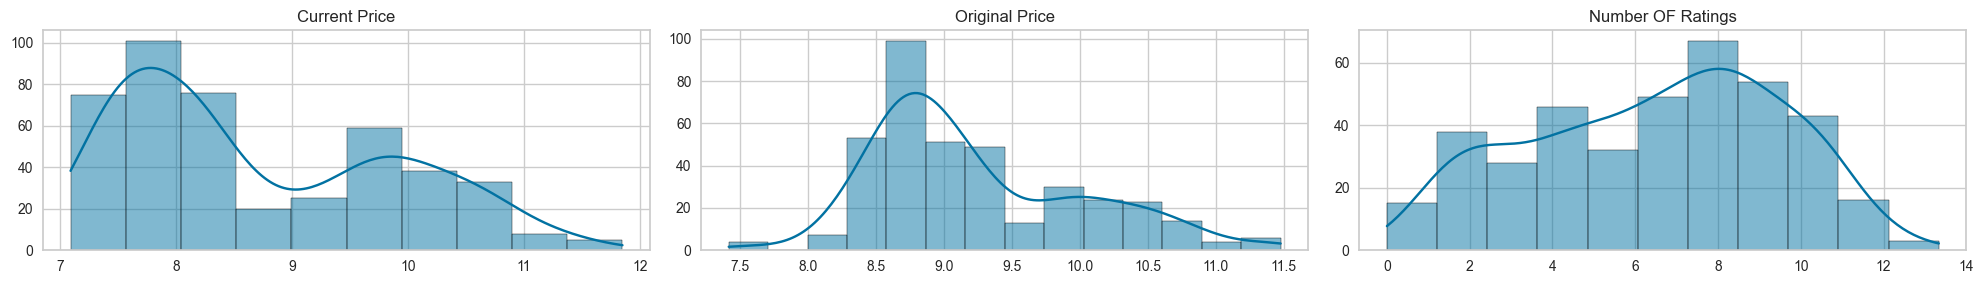

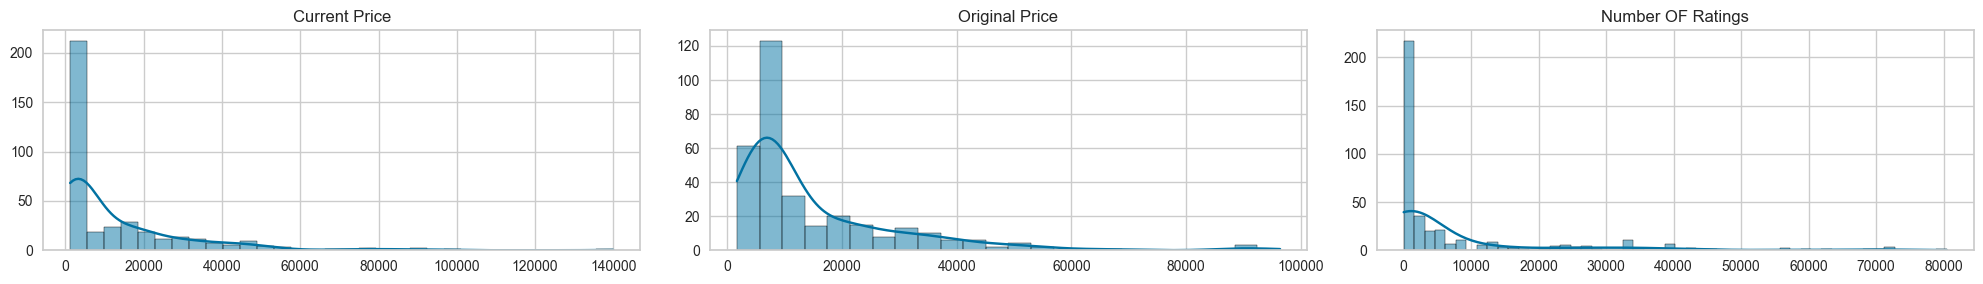

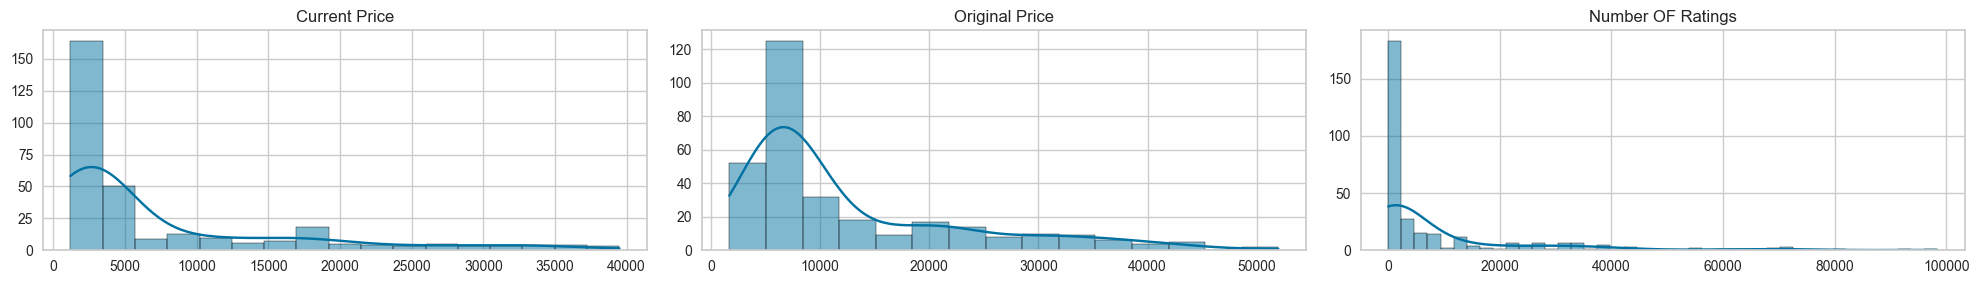

In [693]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Iz prethodnih grafika zakljucujemo da je najbolji izbor za resavanje outlier-a koriscenje logaritma


prebacivanje negativnih u pozitivne vrednosti Discount Percentage

In [694]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]

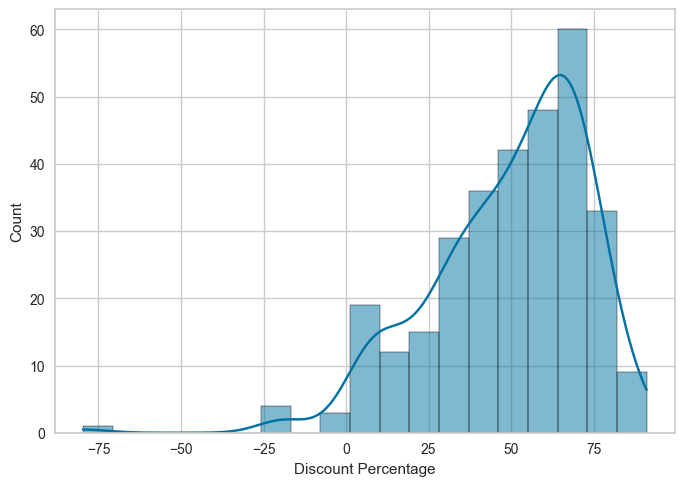

In [695]:

sns.histplot(x="Discount Percentage", data=data2,  kde=True)
plt.show()

## Missing values

In [696]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}

for column in data.columns:
    # count number of rows with missing values
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


,Count,%
Brand,0.0,0.00
Current Price,10.0,2.22
Original Price,73.0,16.22
Discount Percentage,73.0,16.22
Rating,6.0,1.33
Number OF Ratings,59.0,13.11
Model Name,35.0,7.78
Dial Shape,123.0,27.33
Strap Color,123.0,27.33
Strap Material,69.0,15.33


<Axes: >

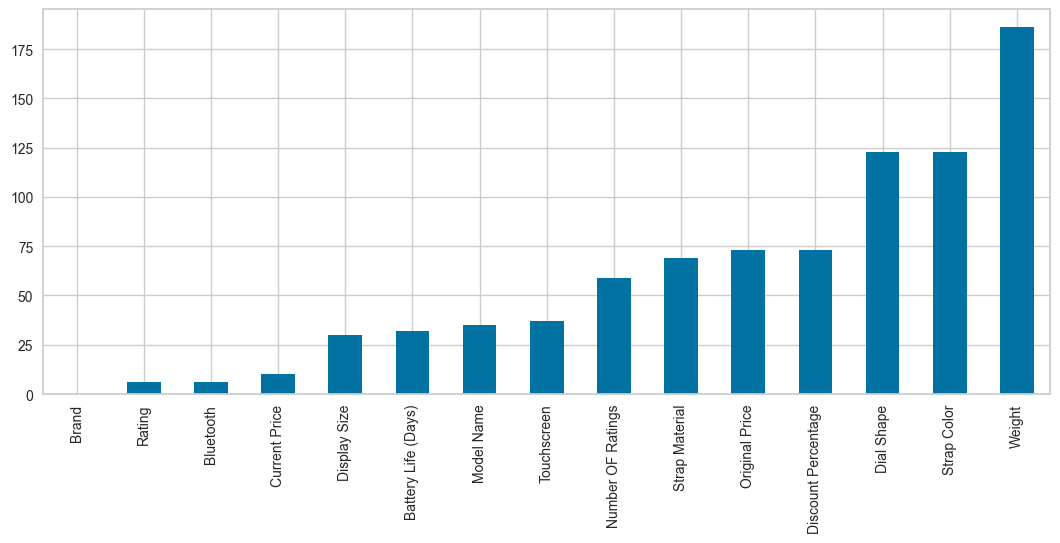

In [697]:

nan_count.plot(kind='bar', figsize=(13, 5))

In [698]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


In [699]:
data = data.drop_duplicates()
data1 = data1.drop_duplicates()

In [700]:

scale_mapper = {
    '75g +': 1,
    '50 - 75 g': 2,
    '35 - 50 g': 3,
    '20 - 35 g': 4,
    '<= 20 g': 5 }

data1["Weight"] = data["Weight"].replace(scale_mapper)

scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)


data1.head()




,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8 inches,2.0
2,boat,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7 inches,3.0
3,fire-boltt,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8 inches,1.0
4,noise,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7 inches,3.0


In [701]:
data1["Display Size"] = data["Display Size"].str.replace(" inches", "")

data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float)
data1["Display Size"] = data1["Display Size"].astype(float)

data1["Display Size"]
data1["Display Size"].isnull().sum()

30

In [702]:

list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 1.5, 1.2 , 0.1]
uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

print(len(data1["Display Size"]))
data1["Display Size"].isnull().sum()


440


30

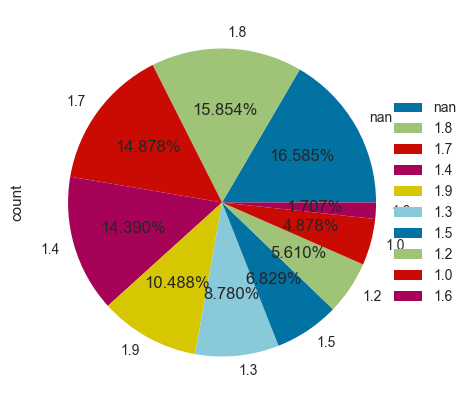

Display Size
1.0    68
1.7    65
1.3    61
1.8    59
1.4    43
0.1    36
1.6    28
1.9    23
1.2    20
1.5     7
Name: count, dtype: int64

In [703]:
plt.figure(figsize=(5, 5))
pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
pie.figure.legend(loc='right')
plt.show()

data1["Display Size"].unique()
data1["Display Size"].value_counts()

In [704]:
data1

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8,2.0
2,boat,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7,3.0
3,fire-boltt,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8,1.0
4,noise,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,True,22.0,True,1.3,NaN
446,fire-boltt,8.216088,9.210240,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,True,8.0,True,0.1,NaN
447,fire-boltt,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,True,22.0,True,1.3,NaN
448,fire-boltt,8.070906,8.987072,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,True,22.0,True,0.1,NaN


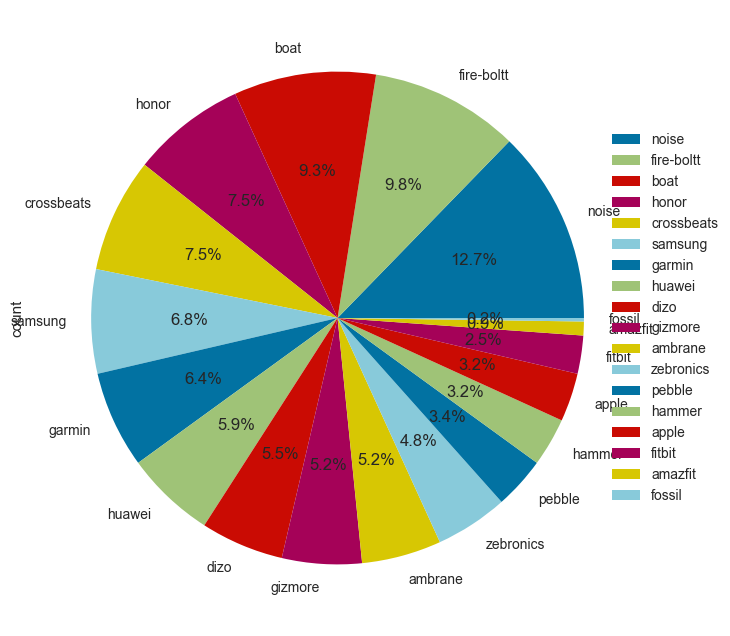

In [705]:
plt.figure(figsize=(8, 8))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
plt.show()

In [706]:
data1.rename(columns={'Brand': 'b'}, inplace=True)

In [707]:

data1 = pd.get_dummies(data=data1, columns=['b' ])
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,...,b_fossil,b_garmin,b_gizmore,b_hammer,b_honor,b_huawei,b_noise,b_pebble,b_samsung,b_zebronics
0,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
1,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
2,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
3,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
4,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
446,8.216088,9.210240,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
447,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,True,...,False,False,False,False,False,False,False,False,False,False
448,8.070906,8.987072,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,True,...,False,False,False,False,False,False,False,False,False,False


In [708]:
data1 = data1.drop(columns=['Weight', "Strap Color", "Dial Shape", "Model Name", "Strap Material" ])
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,...,b_fossil,b_garmin,b_gizmore,b_hammer,b_honor,b_huawei,b_noise,b_pebble,b_samsung,b_zebronics
0,11.326475,11.406453,7.686318,4.0,4.174387,NaN,8.0,True,NaN,3.0,...,False,False,False,False,False,False,True,False,False,False
1,8.242493,9.740910,77.651627,4.3,9.942131,True,3.5,True,1.8,2.0,...,False,False,False,False,False,False,False,False,False,False
2,7.600402,8.985946,74.981227,3.8,9.986173,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,False,False,False,False
3,7.494986,9.903438,91.004550,4.3,9.491300,True,3.5,True,1.8,1.0,...,False,False,False,False,False,False,False,False,False,False
4,7.377134,8.516993,68.013603,4.1,9.539716,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.5,NaN,True,22.0,True,1.3,NaN,...,False,False,False,False,False,False,False,False,False,False
446,8.216088,9.210240,62.996300,NaN,NaN,True,8.0,True,0.1,NaN,...,False,False,False,False,False,False,False,False,False,False
447,8.699348,9.104869,33.337037,2.5,NaN,True,22.0,True,1.3,NaN,...,False,False,False,False,False,False,False,False,False,False
448,8.070906,8.987072,59.994999,NaN,NaN,True,22.0,True,0.1,NaN,...,False,False,False,False,False,False,False,False,False,False


### Filling missing values


Strategije popunjavanja:
- mean
- median
- mode
- constant

In [709]:
data1.fillna(data1.mean(),inplace=True)
data1.isna().sum()


Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
b_amazfit              0
b_ambrane              0
b_apple                0
b_boat                 0
b_crossbeats           0
b_dizo                 0
b_fire-boltt           0
b_fitbit               0
b_fossil               0
b_garmin               0
b_gizmore              0
b_hammer               0
b_honor                0
b_huawei               0
b_noise                0
b_pebble               0
b_samsung              0
b_zebronics            0
dtype: int64

In [710]:
data.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              33
Dial Shape             113
Strap Color            113
Strap Material          66
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [711]:
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,...,b_fossil,b_garmin,b_gizmore,b_hammer,b_honor,b_huawei,b_noise,b_pebble,b_samsung,b_zebronics
0,11.326475,11.406453,7.686318,4.000000,4.174387,0.940447,8.0,True,1.343415,3.000000,...,False,False,False,False,False,False,True,False,False,False
1,8.242493,9.740910,77.651627,4.300000,9.942131,True,3.5,True,1.800000,2.000000,...,False,False,False,False,False,False,False,False,False,False
2,7.600402,8.985946,74.981227,3.800000,9.986173,True,8.0,True,1.700000,3.000000,...,False,False,False,False,False,False,False,False,False,False
3,7.494986,9.903438,91.004550,4.300000,9.491300,True,3.5,True,1.800000,1.000000,...,False,False,False,False,False,False,False,False,False,False
4,7.377134,8.516993,68.013603,4.100000,9.539716,True,8.0,True,1.700000,3.000000,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.500000,6.445428,True,22.0,True,1.300000,3.082677,...,False,False,False,False,False,False,False,False,False,False
446,8.216088,9.210240,62.996300,4.032949,6.445428,True,8.0,True,0.100000,3.082677,...,False,False,False,False,False,False,False,False,False,False
447,8.699348,9.104869,33.337037,2.500000,6.445428,True,22.0,True,1.300000,3.082677,...,False,False,False,False,False,False,False,False,False,False
448,8.070906,8.987072,59.994999,4.032949,6.445428,True,22.0,True,0.100000,3.082677,...,False,False,False,False,False,False,False,False,False,False


## Data corelation

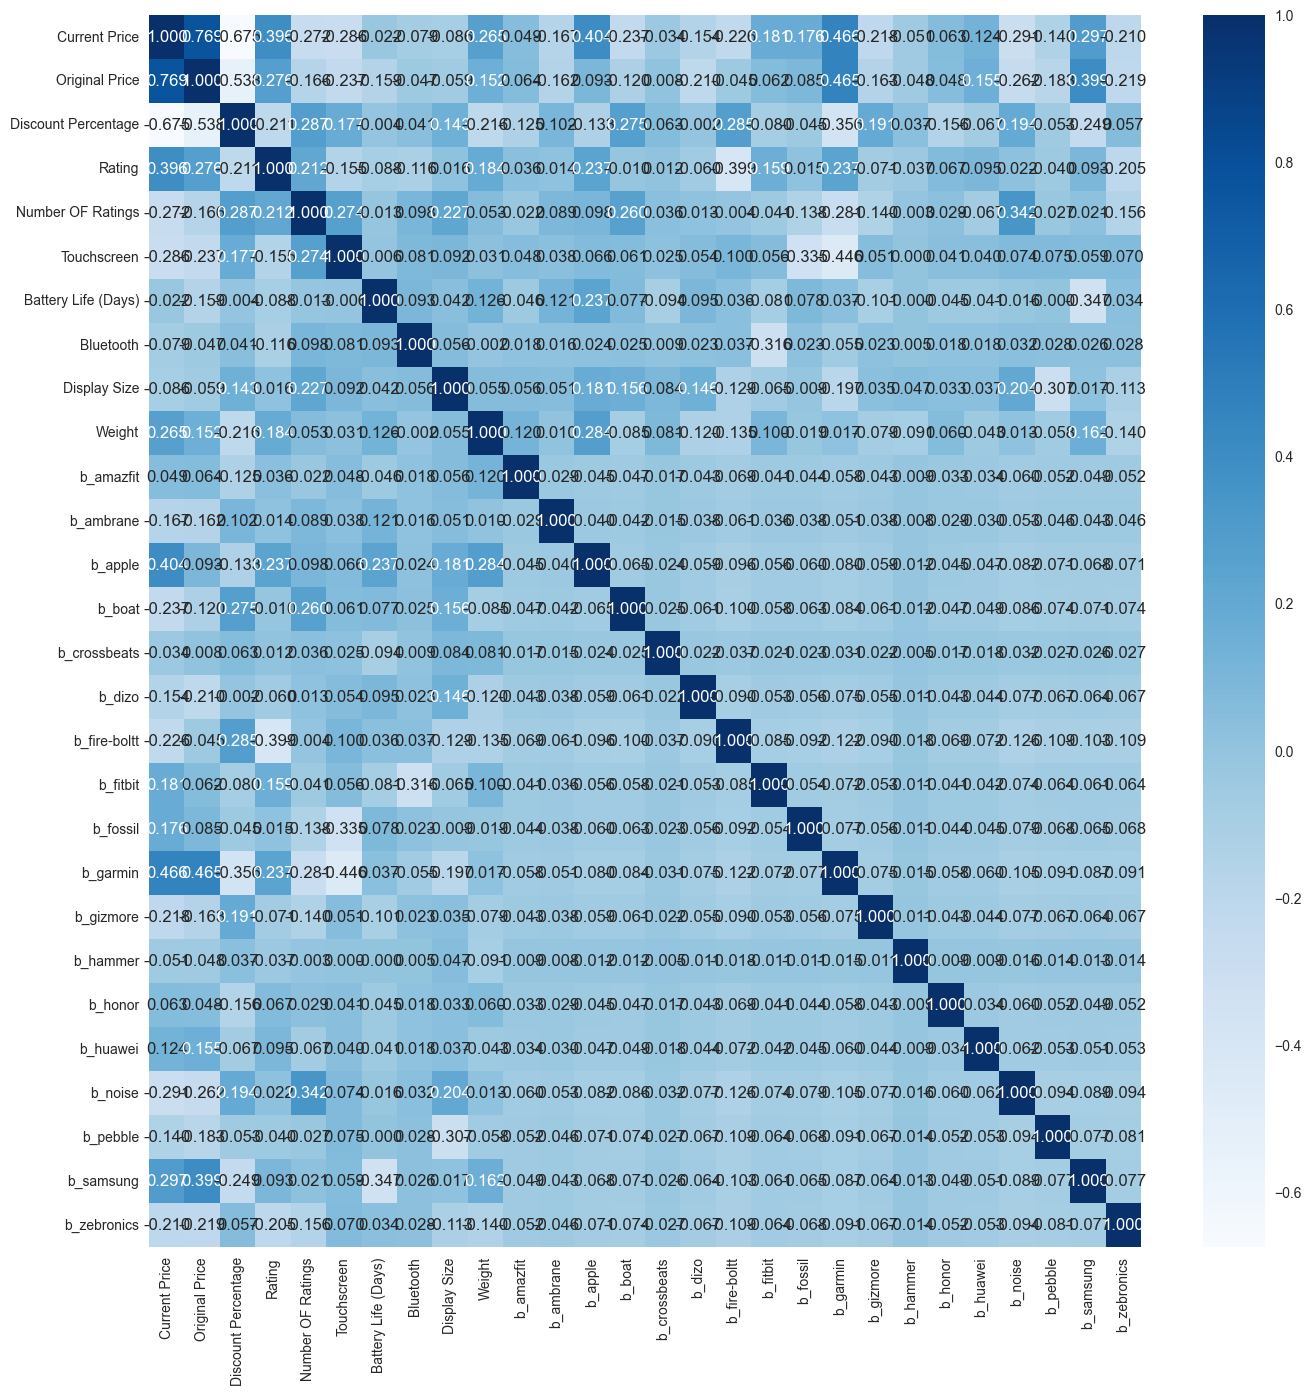

In [712]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

## Standardize data

In [713]:

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)

X = features_std

## Primena algoritama


helper funkcije

In [714]:
def printResult(y_value, X_value, claster_center):
    unique_labels = np.unique(y_value)
    for label in zip(unique_labels):
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], s=25, label=f'Cluster {label}')

    if(claster_center is not None):
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

    plt.title(f'Product Categorization with MeanShift')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printCenters(claster_center):
    plt.figure(figsize=(20, 15))

    for i in range(len(claster_center)):
        plt.subplot(len(claster_center), 1, i + 1)
        plt.bar(range(X.shape[1]), claster_center[i], tick_label=[f'{j[0:8]}' for j in data1.columns])
        plt.title(f'Cluster {i + 1} - Feature Importance')

    plt.tight_layout()
    plt.show()

### Elbow Method

Elbow Method to determine the number of clusters to be formed:


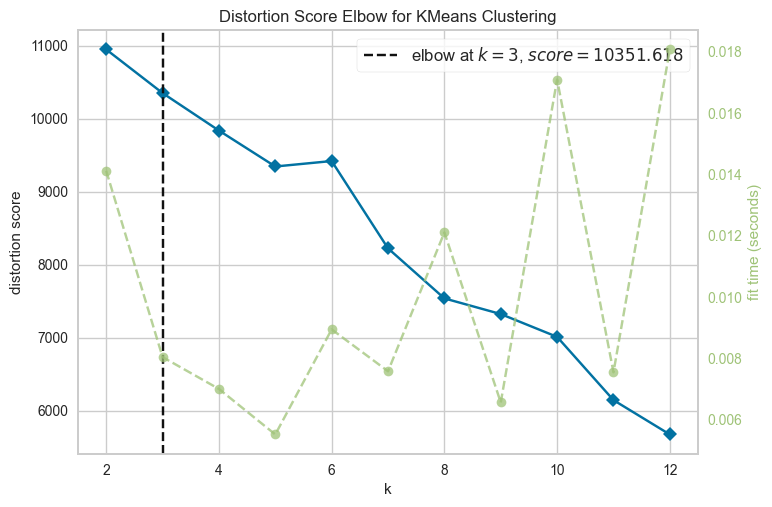

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [717]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=12)
Elbow_M.fit(features_std)
Elbow_M.show()


### K means

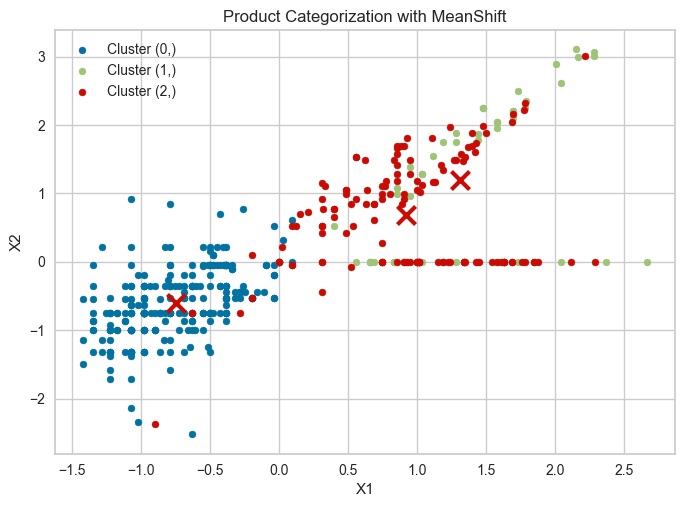

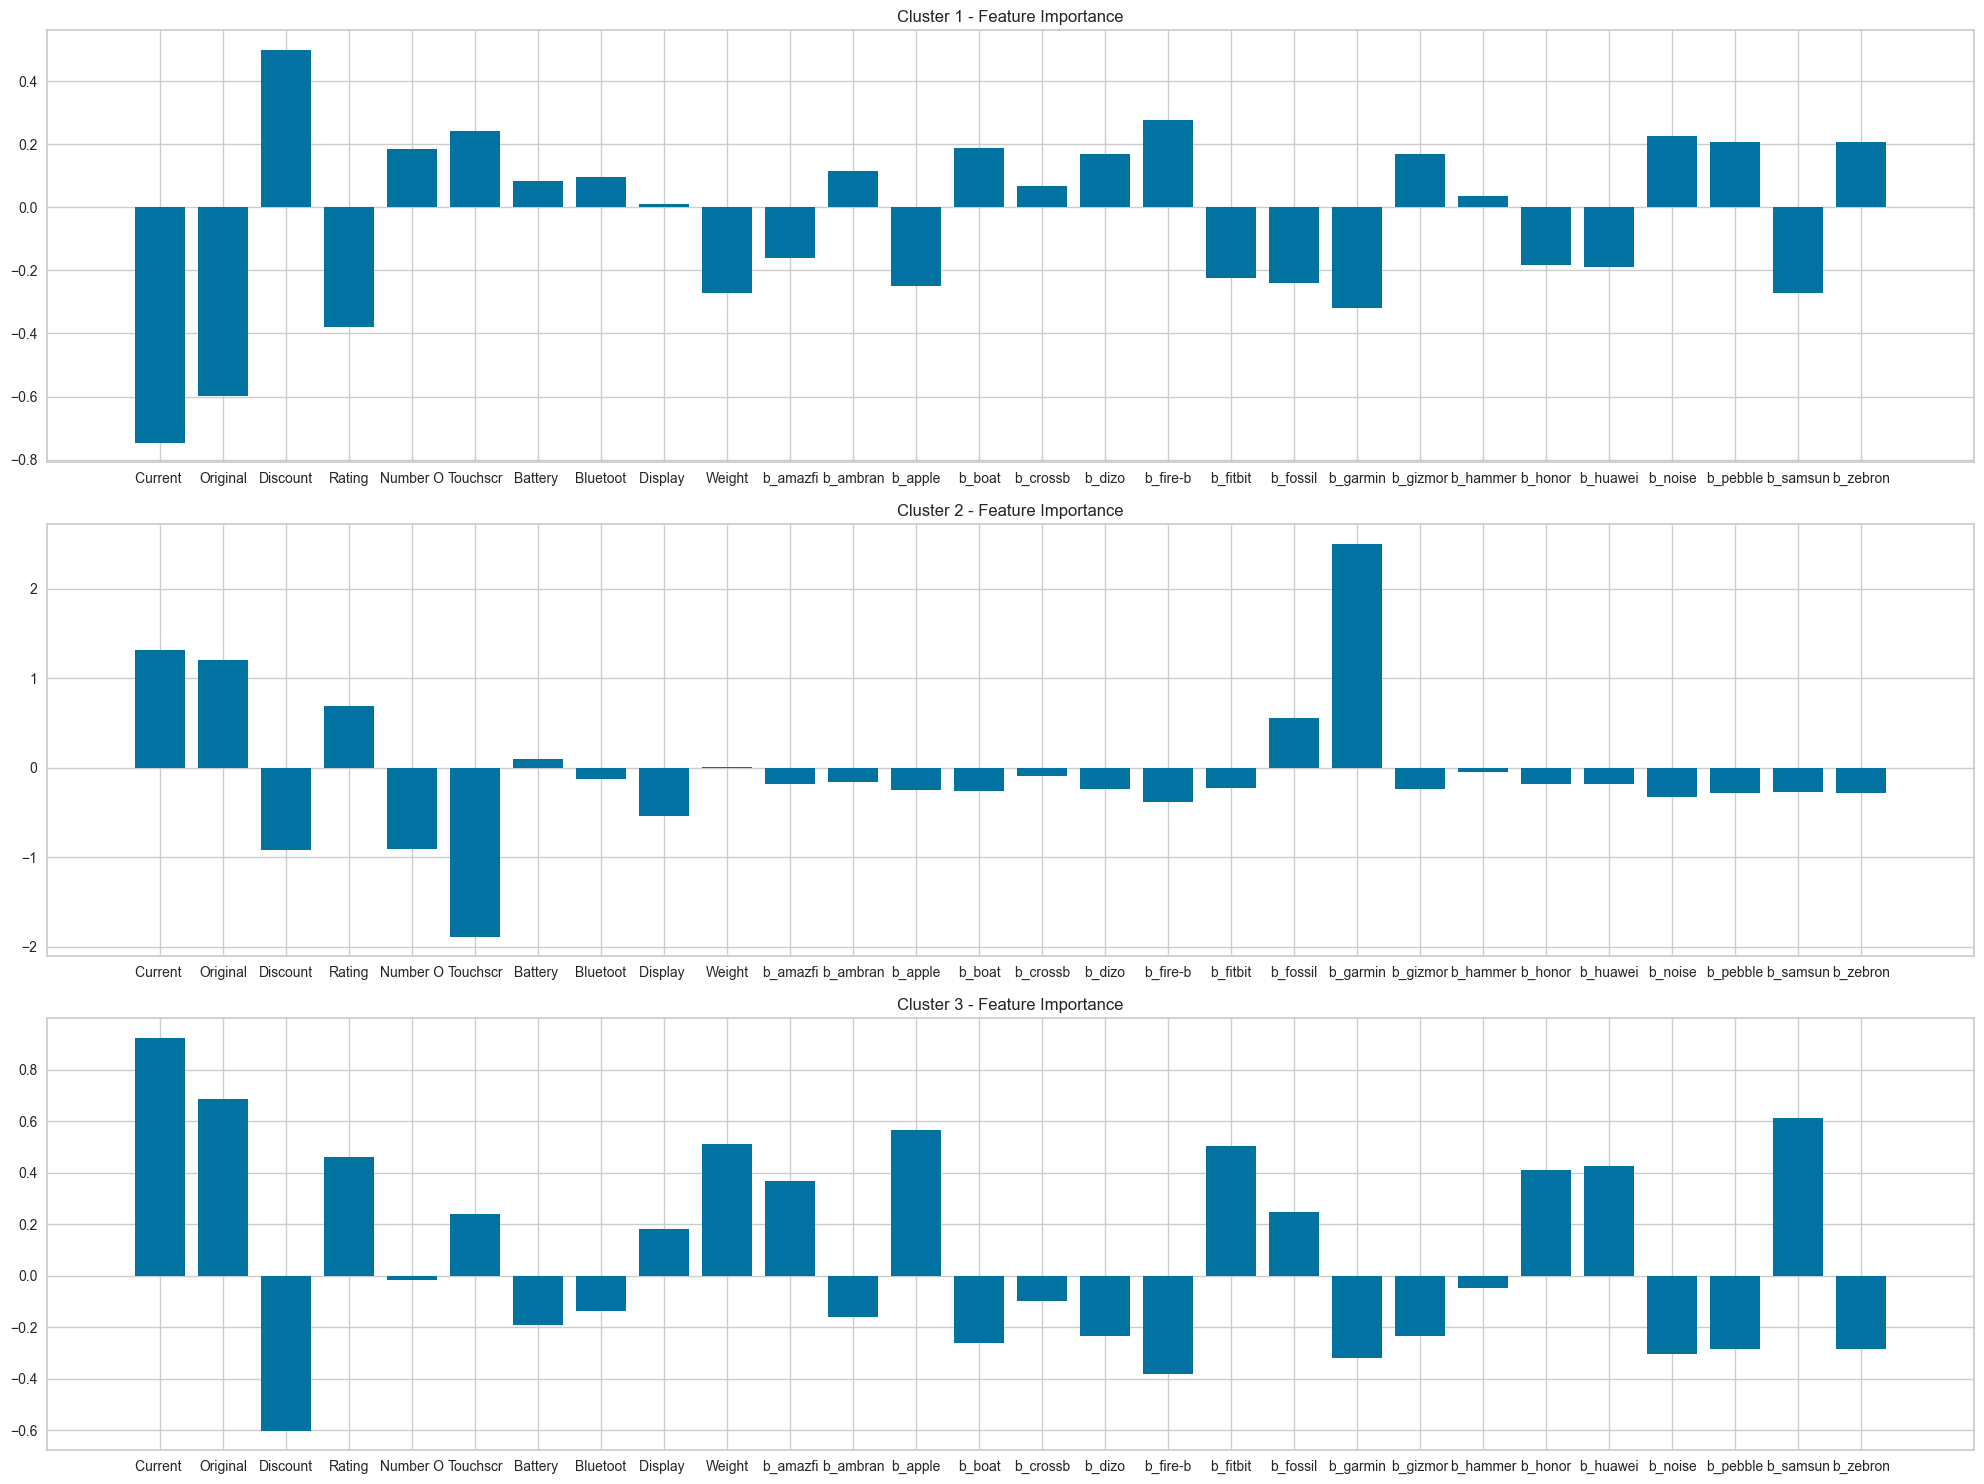

In [718]:

kmeans = KMeans(n_clusters=Elbow_M.elbow_value_, n_init=50, init='k-means++', max_iter=500).fit(X)

pred_kmeans = kmeans.predict(X)

claster_center_kmeans = kmeans.cluster_centers_

printResult(pred_kmeans, X, claster_center_kmeans)
printCenters(claster_center_kmeans)

### MeanShift


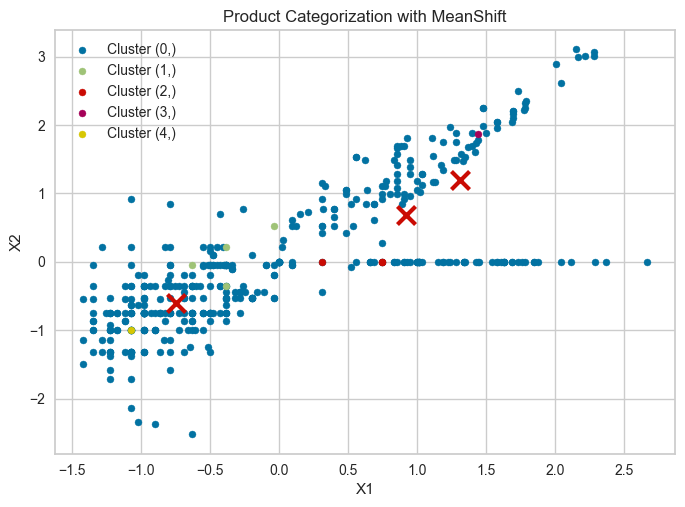

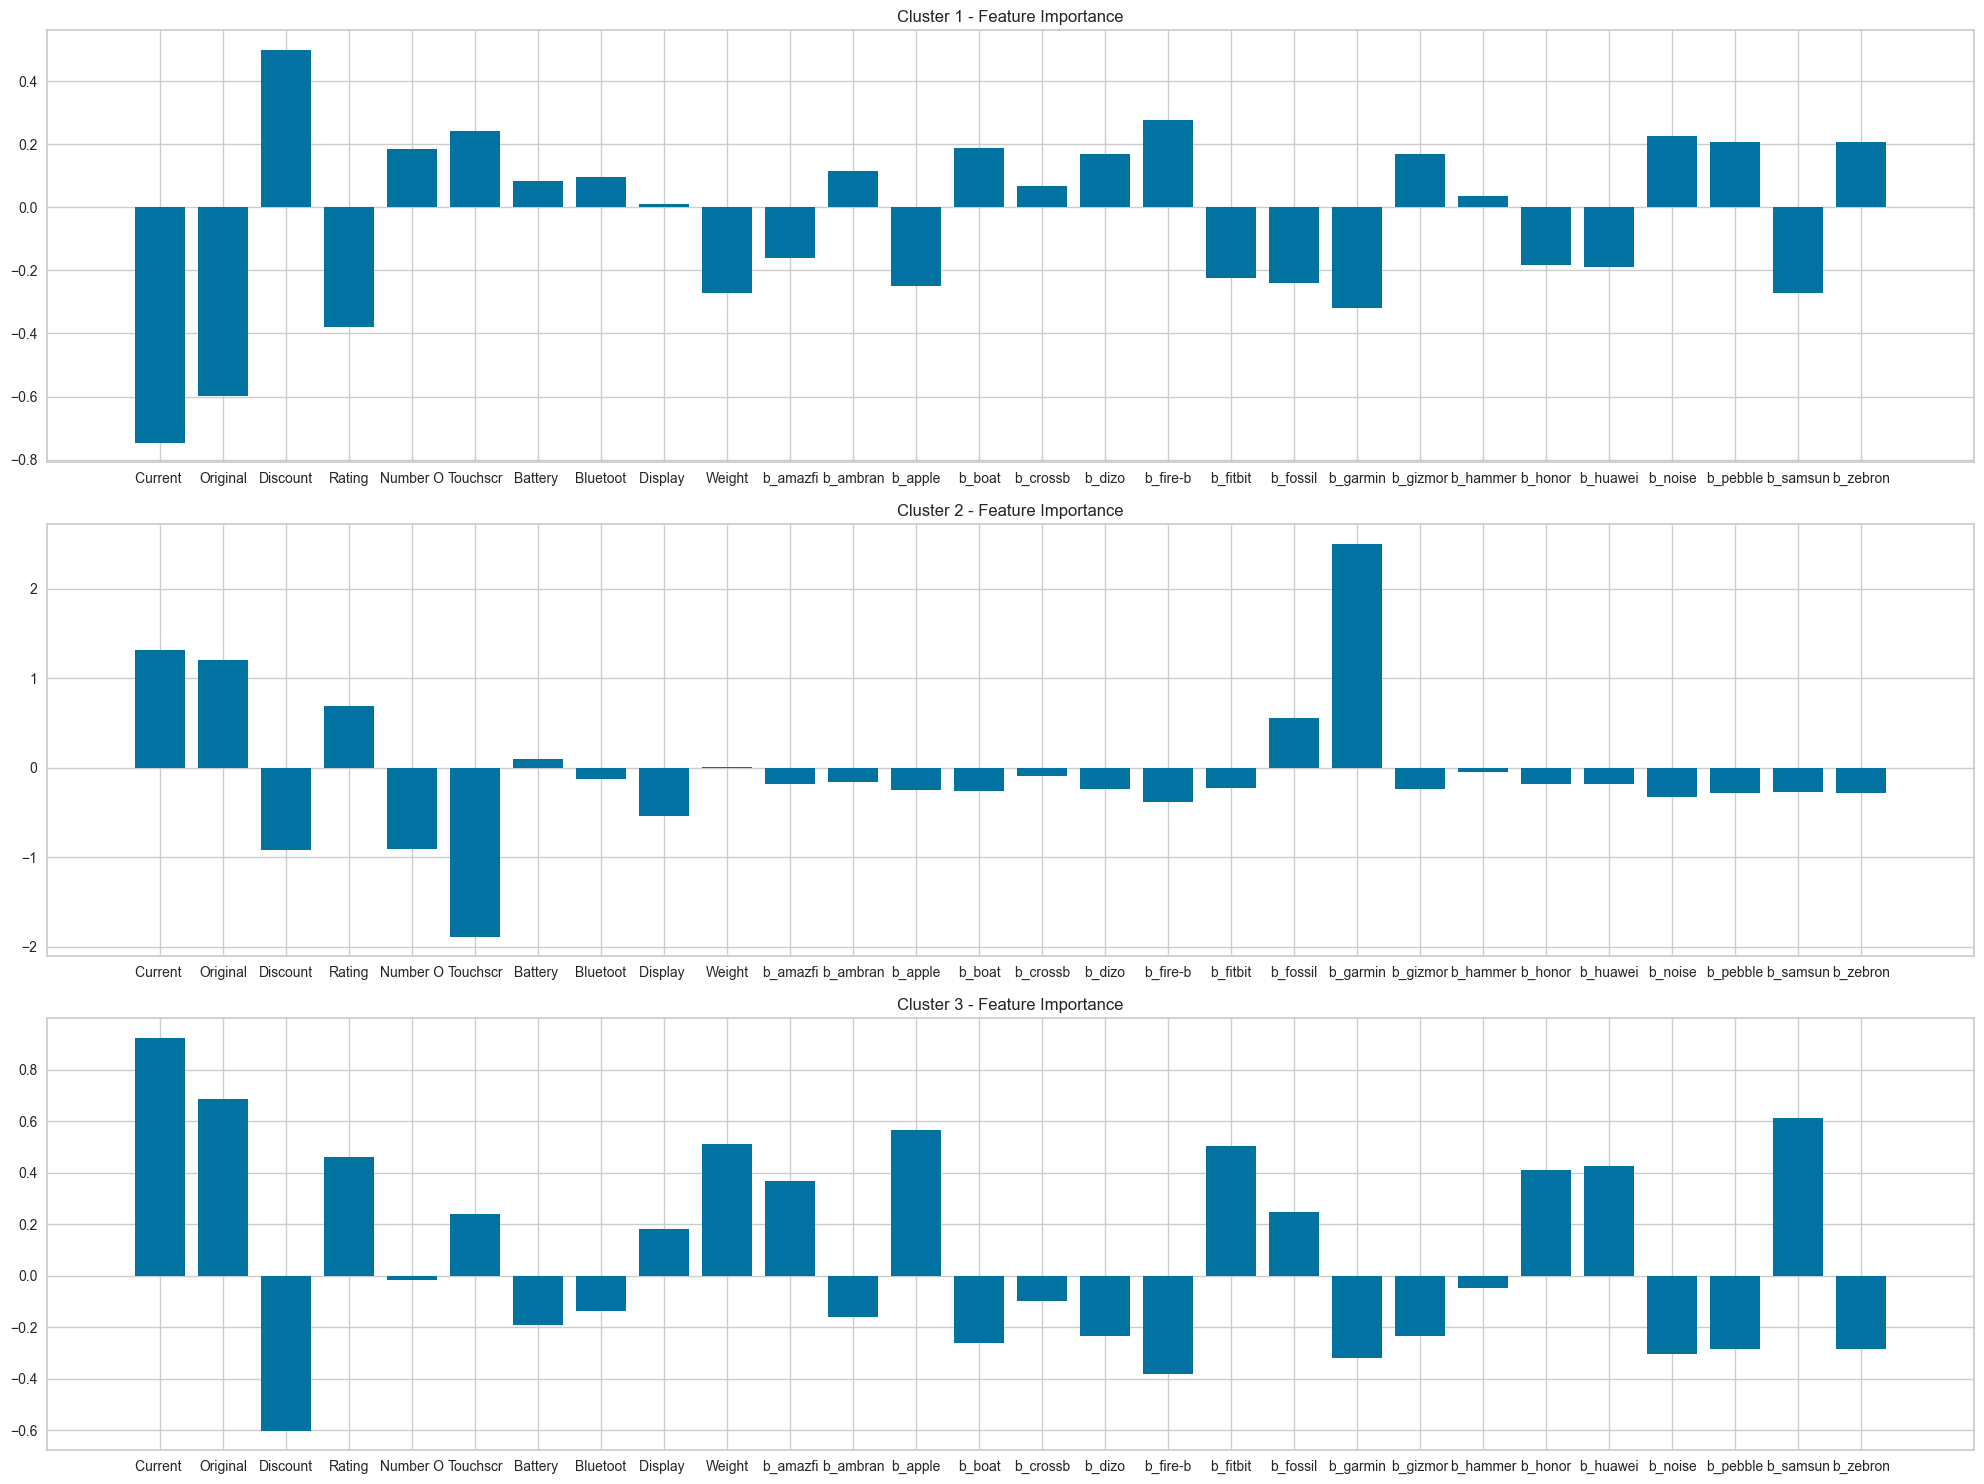

In [719]:

mean_shift = MeanShift().fit(X)

pred_means = mean_shift.predict(X)

# Izračunavanje središta klastera
claster_center_mean_s = kmeans.cluster_centers_

printResult(pred_means, X, claster_center_mean_s)

printCenters(claster_center_mean_s)
 


### DBSCAN

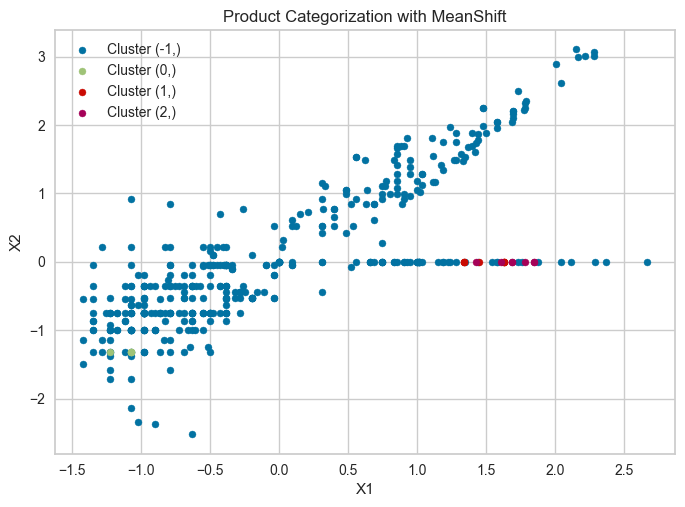

In [720]:


dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(X)

printResult(pred_dbscan, X, None)


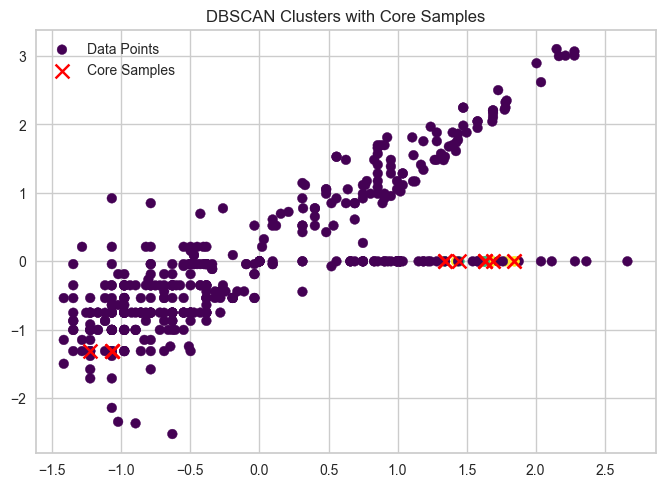

In [721]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

# Extract core samples
core_samples = X[core_samples_mask]


plt.scatter(X[:, 0], X[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()